In [60]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from IPython.display import Image

# Extracción de datos de la web
### En este proyecto, se extraerá información del portal de noticias "Pagina 12" 

In [2]:
url = 'https://www.pagina12.com.ar/' #URL de la página principal
#Traigo la página principal
p12 = requests.get(url)
s = BeautifulSoup(p12.text,'lxml')

In [3]:
# Extraigo los links a las noticias.
secciones = s.find('ul',attrs={'class':'horizontal-list main-sections hide-on-dropdown'}).find_all('li')
link_secciones = [secion.a.get('href') for secion in secciones]

In [4]:
link_secciones

['https://www.pagina12.com.ar/secciones/el-pais',
 'https://www.pagina12.com.ar/secciones/economia',
 'https://www.pagina12.com.ar/secciones/sociedad',
 'https://www.pagina12.com.ar/suplementos/cultura-y-espectaculos',
 'https://www.pagina12.com.ar/secciones/deportes',
 'https://www.pagina12.com.ar/secciones/el-mundo',
 'https://www.pagina12.com.ar/secciones/contratapa']

### Buscar los links a cada noticia.


In [5]:
box_secciones = [requests.get(seccion) for seccion in link_secciones]
box_links =[BeautifulSoup(i.text,'lxml') for i in box_secciones]
box_link =[i.find_all('h4',attrs={'class':'is-display-inline title-list'}) for i in box_links]

In [10]:
all_links = []
for i in box_link:
    if i is not None:
        for j in i:
            all_links.append(j.a.get('href'))

### Obtener información de cada noticia.
Se va a extraer de cada artículo de noticia:
<ul>
    <li>Fecha</li>
    <li>Volanta</li>
    <li>Copeta</li>
    <li>Imagen</li>
    <li>Contenido</li>
</ul>

In [62]:
def obtener_info(soup):
    dic_nota = {}
    
    #fecha -------------------------------------------------------------------------------
        
    fecha_article = soup.find('span',attrs={'pubdate':'pubdate'})
    if fecha_article:
        dic_nota['fecha'] = fecha_article.get('datetime')
        
    #Título -------------------------------------------------------------------------------
        
    volanta_article = soup.find('h1')
    if volanta_article:
        dic_nota['título'] = volanta_article.text
    else:
        dic_nota['título'] = None
        
    #Copete -------------------------------------------------------------------------------
        
    copete_article = soup.find('div', attrs={'class':"col 2-col"})
    if copete_article:
        copete_article = copete_article.find('h4')
        if copete_article:
            dic_nota['copete'] = copete_article.text
        else:
            dic_nota['copete'] = None
    else:
        dic_nota['copete'] = None
            
    #Imagen -------------------------------------------------------------------------------
        
    imagen_article = soup.find('div',attrs={'class':'article-main-media-image__container'})
    if imagen_article:
        imagenes = imagen_article.find_all('img')
    
        if len(imagenes) != 0:
            imagen_src = imagenes[-1].get('data-src')  

            try:
                imagen_req = requests.get(imagen_src)
                    
                if imagen_req.status_code == 200:
                    dic_nota['imagen'] = imagen_req.content
                    
                else:
                    print('La imagen no esta disponible')
                
            except Exception as e:
                    print('Error al hacer el request {e}')         
        else:
            print('Error no hay imagenes')
    #contenido -------------------------------------------------------------------------------
        
    article_text = soup.find('div',attrs={'class':"article-text"})
    if article_text:
            dic_nota['contenido'] = article_text.get_text()
        
    else:
        dic_nota['contenido'] = None
        
    return dic_nota        

In [13]:
def scrape_nota(url):
    try:
        nota = requests.get(url)
    except Exception as e :
        print('\nError')
        print(e)
        return None
    
    if nota.status_code == 200:
        nota_s = BeautifulSoup(nota.text,'lxml')
        dic_nota = obtener_info(nota_s)
        dic_nota['url'] = url
        
        
    else:
        print(f'Error en la {url}')
        print('El status_code no es 200')
        return None
        

    
    return dic_nota
    

Pasar por la función cada link de noticia de la página principal.

In [75]:
data = []

for idx , nota in enumerate(all_links):
    print(f'Escrapenado link {idx}/{len(all_links)-1}')
    data.append(scrape_nota(nota))
    
    

Escrapenado link 0/47
Escrapenado link 1/47
Escrapenado link 2/47
Escrapenado link 3/47
Escrapenado link 4/47
Escrapenado link 5/47
Escrapenado link 6/47
Escrapenado link 7/47
Escrapenado link 8/47
Escrapenado link 9/47
Escrapenado link 10/47
Escrapenado link 11/47
Escrapenado link 12/47
Escrapenado link 13/47
Escrapenado link 14/47
Escrapenado link 15/47
Escrapenado link 16/47
Escrapenado link 17/47
Escrapenado link 18/47
Escrapenado link 19/47
Escrapenado link 20/47
Escrapenado link 21/47
Escrapenado link 22/47
Escrapenado link 23/47
Escrapenado link 24/47
Escrapenado link 25/47
Escrapenado link 26/47
Escrapenado link 27/47
Escrapenado link 28/47
Escrapenado link 29/47
Escrapenado link 30/47
Escrapenado link 31/47
Escrapenado link 32/47
Escrapenado link 33/47
Escrapenado link 34/47
Escrapenado link 35/47
Escrapenado link 36/47
Escrapenado link 37/47
Escrapenado link 38/47
Escrapenado link 39/47
Escrapenado link 40/47
Escrapenado link 41/47
Escrapenado link 42/47
Escrapenado link 43/4

### Pasar la información extraida a un formato extructurado

In [77]:
data_frame = pd.DataFrame(data)

In [78]:
data_frame.head()

,fecha,título,copete,imagen,contenido,url
0,2021-05-12,"El cumpleaños de una novia, la excusa para un ...",Declararon inconstitucional la restricción imp...,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00...,"En un insólito fallo, un juez de la Cámara Fed...",https://www.pagina12.com.ar/341136-el-cumplean...
1,2021-05-12,Alberto Fernández sobre el conflicto palestino...,Declaraciones desde París,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00...,"Antes de reunirse con empresarios en París, Al...",https://www.pagina12.com.ar/341132-alberto-fer...
2,2021-05-12,"Fuerte apoyo de Macron al país: ""Estamos del l...",El presidente de Francia dijo que van a hablar...,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00...,"""Estoy feliz de recibir a Alberto Fernández po...",https://www.pagina12.com.ar/341128-fuerte-apoy...
3,2021-05-12,Alberto Fernández se reunió con empresarios f...,Para una probable reunión con Kristalina Georg...,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00...,Empezó el día con una una reunión con 8 empres...,https://www.pagina12.com.ar/341121-alberto-fer...
4,2021-05-12,El juez federal Marcelo Martínez de Giorgi que...,La causa dejó Lomas de Zamora y pasó a Comodor...,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00...,El juez federal Marcelo Martínez de Giorgi que...,https://www.pagina12.com.ar/340999-el-juez-fed...


Las imágenes estan en binario, pero se pueden procesar facilmente. 

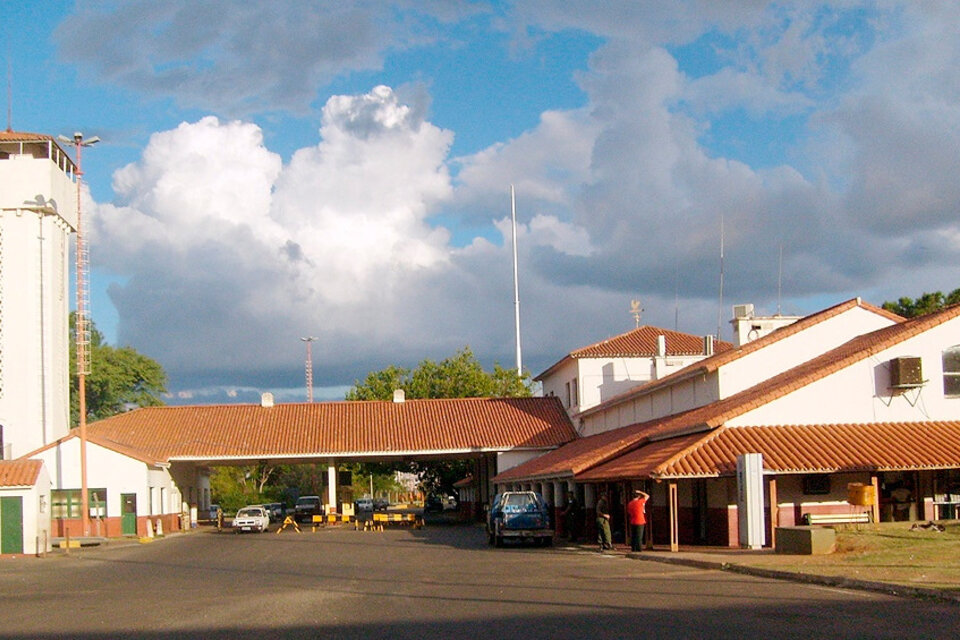

In [79]:
Image(data_frame['imagen'][0])

### Exportar el data frame como un archivo CSV

In [123]:
data_frama.to_csv('notas_p12.csv')